# PHYS 432 Assignment 4
### Plotting velocity vs cost of transport

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
from matplotlib.ticker import FormatStrFormatter

In [55]:
from scipy.optimize import curve_fit

In [7]:
mass_grid = np.array([0.01, 0.1, 1.0, 10.0, 100.0])

In [4]:
velocity_grid = np.logspace(-1,3,100)

In [5]:
def Tucker(vel_bird, mass_bird):
    common_fac = mass_bird / 0.035
    metabolic = (10.57/vel_bird)*(common_fac**(-1/4))
    parasitic = (2.26e-4)*(vel_bird**2)*(common_fac**(-1/3))
    induced = (2.59/(vel_bird**2))*(common_fac**(1/3))
    return metabolic + parasitic + induced

In [18]:
tucker_cost_1 = Tucker(velocity_grid, 0.01)
tucker_cost_2 = Tucker(velocity_grid, 0.1)
tucker_cost_3 = Tucker(velocity_grid, 1.0)
tucker_cost_4 = Tucker(velocity_grid, 10.0)
tucker_cost_5 = Tucker(velocity_grid, 100.0)

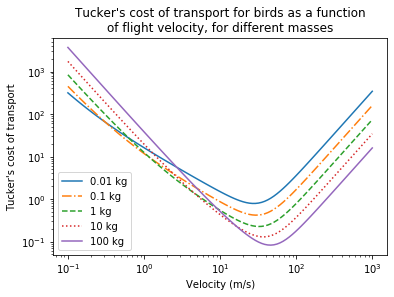

In [23]:
plt.plot(velocity_grid, tucker_cost_1)
plt.plot(velocity_grid, tucker_cost_2, '-.')
plt.plot(velocity_grid, tucker_cost_3, '--')
plt.plot(velocity_grid, tucker_cost_4, ':')
plt.plot(velocity_grid, tucker_cost_5)
plt.xscale("log")
plt.yscale("log")
plt.legend(['0.01 kg','0.1 kg','1 kg','10 kg','100 kg'])
plt.xlabel('Velocity (m/s)')
plt.ylabel("Tucker's cost of transport")
plt.title("Tucker's cost of transport for birds as a function\nof flight velocity, for different masses")
#plt.savefig("Tucker_bird_q2.pdf",format="pdf")
plt.show()

### Power law fitting:

In [38]:
# Flying speed that minimizes cost of transport for each mass:
opt_vel_1, min_cost_1 = velocity_grid[np.argmin(tucker_cost_1)], tucker_cost_1[np.argmin(tucker_cost_1)]
opt_vel_2, min_cost_2 = velocity_grid[np.argmin(tucker_cost_2)], tucker_cost_2[np.argmin(tucker_cost_2)]
opt_vel_3, min_cost_3 = velocity_grid[np.argmin(tucker_cost_3)], tucker_cost_3[np.argmin(tucker_cost_3)]
opt_vel_4, min_cost_4 = velocity_grid[np.argmin(tucker_cost_4)], tucker_cost_4[np.argmin(tucker_cost_4)]
opt_vel_5, min_cost_5 = velocity_grid[np.argmin(tucker_cost_5)], tucker_cost_5[np.argmin(tucker_cost_5)]

In [105]:
print("{:.1f}".format(opt_vel_1), "{:.1f}".format(opt_vel_2), "{:.1f}".format(opt_vel_3), 
      "{:.1f}".format(opt_vel_4), "{:.1f}".format(opt_vel_5))
print("{:.3f}".format(min_cost_1), "{:.3f}".format(min_cost_2), "{:.3f}".format(min_cost_3), 
      "{:.3f}".format(min_cost_4), "{:.3f}".format(min_cost_5))

26.6 29.2 32.0 38.5 46.4
0.789 0.419 0.226 0.129 0.083


In [41]:
min_cost_array = np.array([min_cost_1, min_cost_2, min_cost_3, min_cost_4, min_cost_5])

In [75]:
def power_law_q3(mass,exponent,const):
    return const*(mass**exponent)# + const

In [76]:
popt1, pcov1 = curve_fit(power_law_q3, mass_grid, min_cost_array)

In [106]:
print('const = ', popt1[0], 'exponent = ', popt1[1])

const =  -0.2656070724284883 exponent =  0.231092151313167


In [99]:
print(np.sqrt(pcov1))

[[0.00652009 0.00600486]
 [0.00600486 0.00608527]]


In [77]:
velocity_grid2 = np.logspace(-2,2,100)

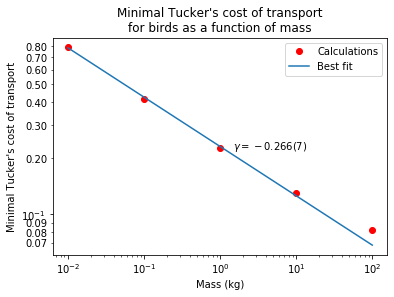

In [109]:
plt.plot(mass_grid, min_cost_array, 'ro')
plt.plot(velocity_grid2,power_law_q3(velocity_grid2,popt1[0],popt1[1]))
plt.xscale("log")
plt.yscale("log")
ax = plt.gca()
ax.set_yscale('log')
plt.tick_params(axis='y', which='minor')
ax.yaxis.set_minor_formatter(FormatStrFormatter("%.2f"))
plt.xlabel('Mass (kg)')
plt.ylabel("Minimal Tucker's cost of transport")
plt.title("Minimal Tucker's cost of transport\nfor birds as a function of mass")
plt.legend(['Calculations','Best fit'])
plt.text(0.65, 0.5, '$\gamma = -0.266(7)$', horizontalalignment='center',
     verticalalignment='center', transform=ax.transAxes)
#plt.savefig("Tucker_bird_q3.pdf",format="pdf")
plt.show()